<a href="https://colab.research.google.com/github/srivardhaniR/mahcine-learning-models-/blob/main/face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
jbbimport cv2
import os
from google.colab.patches import cv2_imshow

In [ ]:
import dlib

In [ ]:
!pip uninstall -y mediapipe
!pip install mediapipe==0.10.21



Found existing installation: mediapipe 0.10.21
Uninstalling mediapipe-0.10.21:
  Successfully uninstalled mediapipe-0.10.21
  Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl (35.6 MB)


DETECTING FACE USING PRETRAINED MODEL FACE_DETECTION MODEL
FOR AN INPUT IMAGE

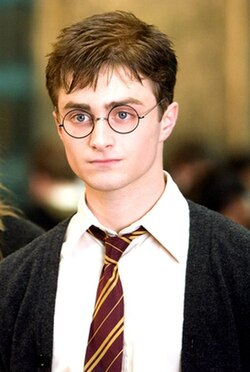

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow
import mediapipe as mp #for face detection
from matplotlib import pyplot as plt
import urllib.request #to download images form the web to test manually
image_path=os.path.join('.','data','/content/Harry_Potter.jpg')
img=cv2.imread(image_path)
cv2_imshow(img)

In [ ]:
#intialise mediapipe face detection
face_detect=mp.solutions.face_detection #intializing media pipe
#solution consists lot of pretrained models like face_detection etc
drawing=mp.solutions.drawing_utils
#solution also has drawing_util which helps us draw on the imagees like boundary box around the face etc


In [ ]:
#creating face detection object
face_detection=face_detect.FaceDetection(model_selection=0,min_detection_confidence=0.5)
#model_selction range of the model to detect, 0 is for webcam
#min_detection_confidence is threshold that is here we kept 0.5 i.e., model detects faces with 50 % confidence


In [ ]:
# we need to proecess the image
image_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#we need to convert our bgr image to rgb because mediapipe require that image format
result=face_detection.process(image_rgb)
# process() runs deep learning modeland returns the detection result by drawing a boundary box around it

In [ ]:
if result.detections: #if face is detected draw them on the original image too
  for detection in result.detections:
    drawing.draw_detection(img,detection)
#results.detection contains all faecs detectes in the img
#draw_detection draws bounding box  on the original image directly



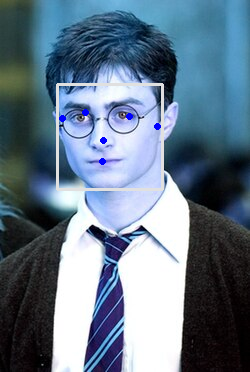

In [ ]:
result_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
cv2_imshow(result_img)

DETECTING FACE  OVER A WEBCAM

In [ ]:
import cv2
import os
import mediapipe as mp
from IPython.display import display, Image
from google.colab.patches import cv2_imshow

face_detect=mp.solutions.face_detection
drawing=mp.solutions.drawing_utils
face_detection=face_detect.FaceDetection(model_selection=0,min_detection_confidence=0.5)

#opne web cam and detect faces

web_cam=cv2.VideoCapture(0)

while web_cam.isOpened():
  opened, frame=web_cam.read()
  if not opened:
    break
  #converting original to rgb to use mediapipe
  img=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

  #proecessing the converted image to detect the face
  result=face_detection.process(img)

  #convert the rgb image to original image
  img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

  #draw face detection
  if result.detections:
    for detection in result.detections:
      drawing.draw_detection(image, detection)

  cv2.imshow('Face_Detecting',img)

  if cv2.waitKey(0) &0xFF==ord('q'):
    break
web_cam.release()
cv2.destroyAllWindows()

In [ ]:
pip install facenet-pytorch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 653.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124

In [ ]:
import tensorflow as ts
from tensorflow import keras
import os
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import cv2
import PIL
from PIL import Image
from facenet_pytorch import MTCNN
import torchvision.transforms as transforms


ModuleNotFoundError: No module named 'facenet_pytorch'